# Deep Copy (two levels deep)

## Reminder: aliasing



In [1]:
L1 = [5, 6, 7]
L2 = L1     #L1 and L2 are aliases
            #changing the contents of L1 <=> changing the contents of L2
            #since L1 and L2 refer to the same address in memory
        
L2[0] = 42  #L1[0] changes as well

L2 = 42     #L1[0] doesn't change
            #L2 now refers to 42 instead of the list [42, 6, 7]: that change
            #is reflected in the GLOBALS table
            #
            #This is analgous to
            #a = 5
            #b = a
            #a = 42   #b still refers to 5

## Reminder: shallow copy

We can make a shallow copy of `L1` using

In [2]:
L1 = [5, 6, 7]
L2 = L1[:] #same as L2 = [L1[0], L1[1], L1[2]]

Here, we are creating a *new* list, in a *new* location in memory, whose contents are the same as the contents of L2. 

Changing the contents of `L2` (e.g., `L2[0] = 42`) is not the same as changing the contents of `L1`.

## Reminder: the problem with shallow copy

Consider the following:

In [3]:
L1 = [[1, 2], [3, 4]]
L2 = L1[:] #same as L2 = [L1[0], L1[1]]

Here, we have create a new list `L2`, but we haven't created new copies of the lists `L1[0]` and `L1[1]`.

`L1[0]` refers to the same memory address as `L2[0]`

That is, `id(L1[0]) == id(L2[0])`.

In other words,`L1[0]` and `L2[0]` are aliases.

So modifying the contents of `L1[0]` is the same as modifying the contents of `L2[0]`.

For example, `L1[0][0] = 5` is the same as `L2[0][0] = 5`.

On the other hand, just like before, `L1[0] = 5` is *not* the same as `L2[0] = 5` -- `L1` and `L2` are two separate lists.

## Reminder: deep copy

Here is a way to create a deep copy of `L1` (if `L1` is a list of lists of two ints):

In [4]:
L1 = [[1, 2], [3, 4]]
L2 = [[L1[0][0], L1[0][1]], [L1[1][0], L1[1][1]]]

Now, we've create 3 new lists when creating `L2`: the two inner lists, and the outer list. `L1` and `L2` are completely disconnected.

In [5]:
L2 = [[L1[0][0], L1[0][1]], [L1[1][0], L1[1][1]]]
L1[1][0] = 7
print("L1 = ", L1)
print("L2 = ", L2)

L1 =  [[1, 2], [7, 4]]
L2 =  [[1, 2], [3, 4]]


## Reminder: another way to do shallow copy

Remember that we did shallow copy of lists by repeatedly appending elements from the old list to the new list:

In [6]:
L1 = [[1, 2], [3, 4]]
L2 = []
for sublist in L1:
    L2.append(sublist)

The above is a shallow copy: we only create a single new list, `L2`. After the process ends, `L1[0]` and `L2[0]`, as well as `L1[1]` and `L2[1]` are aliases.

## Deep copy of a list of lists of ints

However, there is a quick fix here: just use `sublist[:]`. That creates a new copy of the list that `sublist` refers to:

In [7]:
L1 = [[1, 2], [3, 4]]
L2 = []
for sublist in L1:
    L2.append(sublist[:])    

Now, we've created a deep copy of `L1`, without specifying the lengths of the outer list, or the inner lists. Every time we execute
    
    L2.append(sublist[:])
    
a new list is put in memory, and is then appended to `L2` as its new last element.

## We need to go deeper (sometimes)

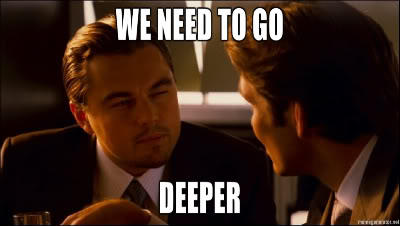

In [1]:
from IPython.display import Image, display

# Specify the path to your image
image_path = 'deeper1.jpg'

# Display the image
display(Image(filename=image_path))

Suppose the list is `L1 = [[[1]]]`. Can we make a deep copy of that list using the previous method (without modifications)? No.

In [2]:
from IPython.display import display, HTML
import urllib.parse

def generate_python_tutor_button(code):
    # Encode the code as a URL-safe string
    encoded_code = urllib.parse.quote_plus(code)
    
    # Create the Python Tutor URL
    python_tutor_url = f"https://pythontutor.com/render.html#code={encoded_code}&cumulative=false&heapPrimitives=nevernest&mode=edit&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"
    
    # Create the HTML button
    button_html = f'<button><a href="{python_tutor_url}" target="_blank">Run in Python Tutor</a></button>'
    
    # Display the button
    display(HTML(button_html))

# Example usage:
code_to_run = """
# block 1
L1 = [[[1]]]
L2 = []
for sublist in L1:
    L2.append(sublist[:]) 
    
# block 2
L2[0][0][0]=5

# block 3
L1[0][0][0]
"""

generate_python_tutor_button(code_to_run)

In [8]:
L1 = [[[1]]]
L2 = []
for sublist in L1:
    L2.append(sublist[:])  

In [9]:
L2[0][0][0]=5

In [10]:
L1[0][0][0]

5

The problem is that we've created a new list whose element is a copy of `[[1]]`. However, we never made a copy of the innermost list, `[1]`. If its contents are modified, that has an effect everywhere.

```{hint} There is often a midterm/exam question asking you to predict the final state of lists that may be deep/shallow copies of each other. Be familiar with tracing the code *without* running it.
```